In [25]:
import pandas as pd

raw_df = pd.read_csv('./data/(2023.12기준)_전국공장등록현황.csv', encoding='cp949')

In [26]:
raw_df.head()

,순번,회사명,단지명,생산품,공장주소
0,1,남일문화 (주),,인쇄물,서울특별시 종로구 자하문로16길 8 (창성동)
1,2,(주)에취.알.디,,"모형전시물,IC TESTER외",서울특별시 종로구 통의동 35-69번지
2,3,(주)코리아쉬핑가제트,,주간신문,서울특별시 종로구 자하문로2길 13-3 (통의동)
3,4,삼영DP,,인쇄,서울특별시 종로구 사직로 125 (적선동)
4,5,중앙인쇄사,,인쇄물,서울특별시 종로구 자하문로2길 18 (적선동)


In [27]:
seoul_factory_df = raw_df[raw_df['공장주소'].str.startswith('서울')].reset_index(drop=True)
seoul_factory_df.tail()

,순번,회사명,단지명,생산품,공장주소
11347,11349,주식회사 미호코리아,,"지갑, 가방, 의류, 악세사리","서울특별시 강동구 진황도로 18, 2층 (천호동, 현대프라자)"
11348,11350,주식회사 세종스포츠,,자켓 및 점퍼,서울특별시 강동구 양재대로 1595 (천호동)
11349,11351,코코산업,,장신용 체인류,서울특별시 강동구 구천면로 262-10 (천호동)
11350,11352,한국가죽산업협동조합,,핸드백 및 지갑 제조업,"서울특별시 강동구 올림픽로92길 26, 3층 (천호동, 서흥빌딩)"
11351,11353,한올EMB,,자수제품 및 자수용재료 제조업,"서울특별시 강동구 올림픽로 732, 2층 (천호동, 현대자동차천호대리점)"


In [28]:
seoul_factory_gu = seoul_factory_df['공장주소'].str.split().str[1]

In [30]:
gu_fact_df = seoul_factory_gu.to_frame()

In [32]:
gu_fact_df['공장주소'] = gu_fact_df['공장주소'].str.replace('[^가-힣]', '', regex=True)

In [33]:
gu_df = gu_fact_df.groupby(['공장주소']).value_counts().to_frame()

In [34]:
gu_df.to_csv('./filtered_data/자치구별_공장수.csv')

상관계수 (Pearson r): -0.1597
유의확률 (p-value): 0.4457
결과: 통계적으로 유의미하지 않습니다.


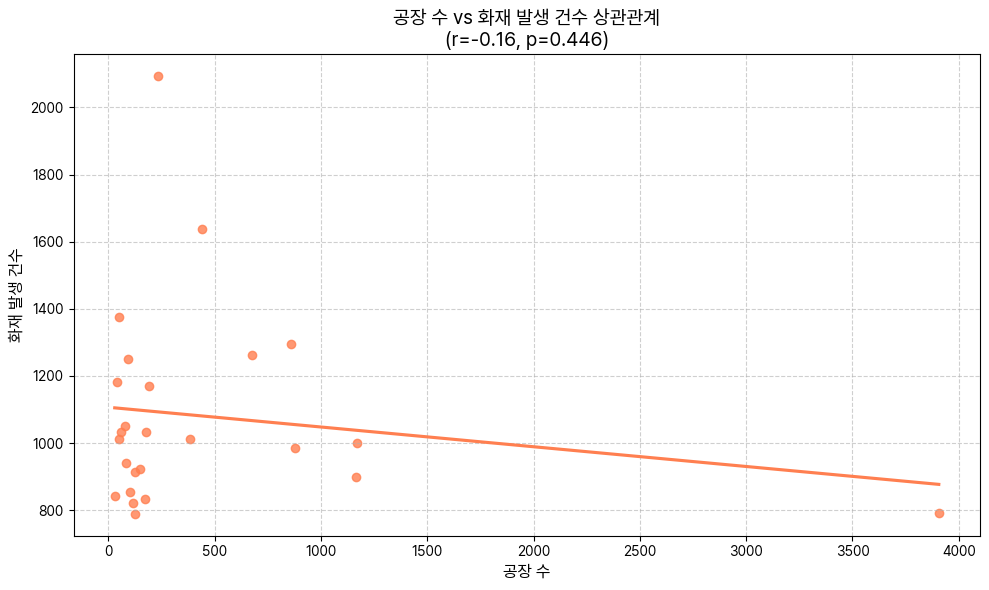

In [51]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Pretendard'
plt.rcParams['axes.unicode_minus'] = False
# 1. 데이터 로드 및 전처리
df_factory = pd.read_csv('./filtered_data/자치구별_공장수.csv')
df_fire = pd.read_csv('./filtered_data/gu_fire_counts.csv')

# 공장 데이터 정제 (특수문자 제거 및 그룹화)
if '공장주소' in df_factory.columns:
    df_factory['자치구'] = df_factory['공장주소'].str.replace('[^가-힣]', '', regex=True)
else:
    df_factory['자치구'] = df_factory.iloc[:, 0].str.replace('[^가-힣]', '', regex=True)

df_factory_clean = df_factory.groupby('자치구')['count'].sum().reset_index()
df_factory_clean.columns = ['자치구', '공장수']

# 화재 데이터 컬럼명 통일
if '화재건수' not in df_fire.columns:
    df_fire.columns = ['자치구', '화재건수']

# 데이터 병합
df_merged = pd.merge(df_factory_clean, df_fire, on='자치구')

# 2. 통계 분석 (상관계수 및 p-value 계산)
correlation, p_value = stats.pearsonr(df_merged['공장수'], df_merged['화재건수'])

print(f"상관계수 (Pearson r): {correlation:.4f}")
print(f"유의확률 (p-value): {p_value:.4f}")

if p_value < 0.05:
    print("결과: 통계적으로 유의미한 상관관계가 있습니다.")
else:
    print("결과: 통계적으로 유의미하지 않습니다.")

# 3. 시각화
plt.figure(figsize=(10, 6))
# 신뢰구간(ci=95)을 포함한 회귀선 그리기
sns.regplot(x='공장수', y='화재건수', data=df_merged, color='coral', ci=None)

plt.title(f'공장 수 vs 화재 발생 건수 상관관계\n(r={correlation:.2f}, p={p_value:.3f})', fontsize=14)
plt.xlabel('공장 수', fontsize=12)
plt.ylabel('화재 발생 건수', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig('./results/factory_fire_correlation_pvalue.png')
plt.show()

상관계수 (밀도 vs 밀도): 0.4436
p-value: 0.0263


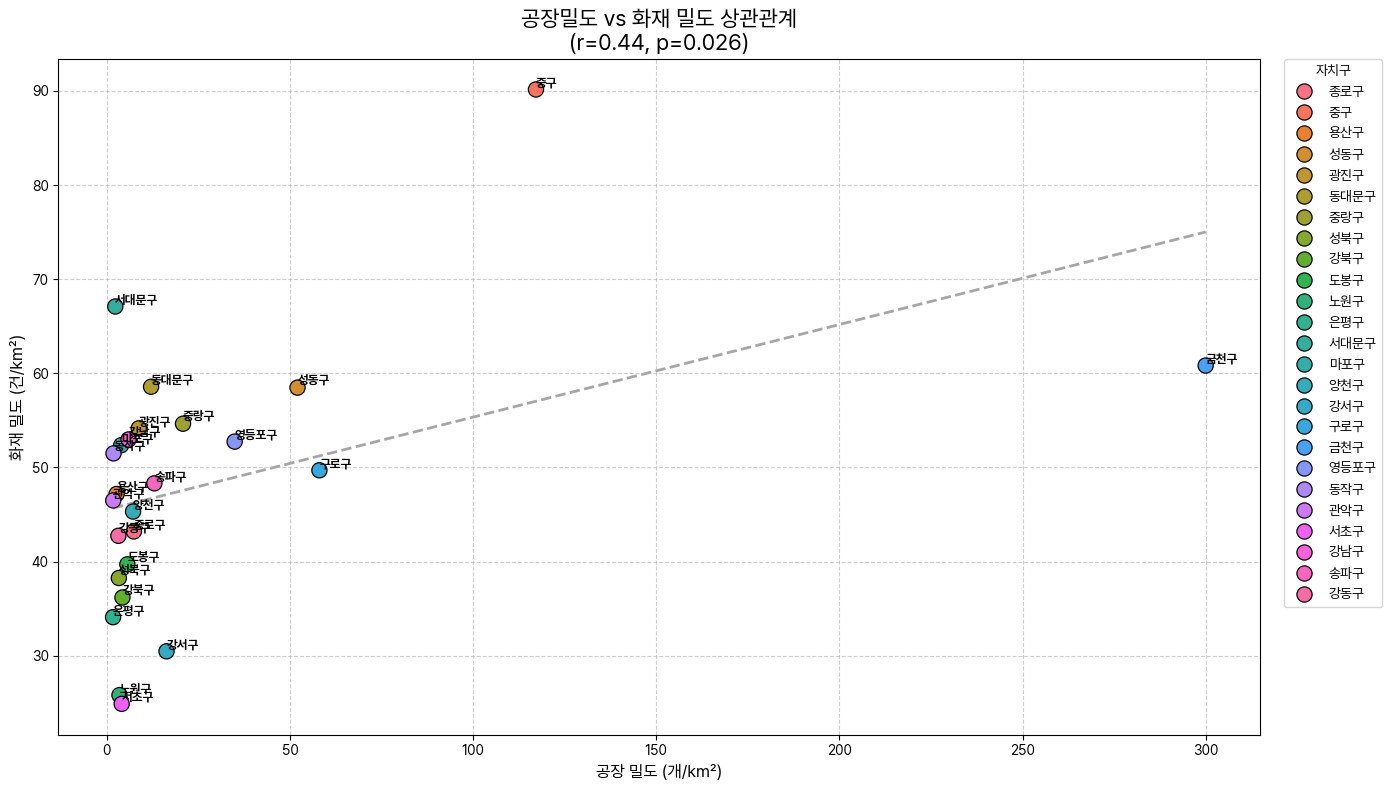

In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Windows: 'Malgun Gothic', Mac: 'AppleGothic')
plt.rc('font', family='Pretendard') 
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 1. 데이터 로드
df_area = pd.read_csv('./data/행정구역(구별)_20251207175910.csv', header=2)
df_factory = pd.read_csv('./filtered_data/자치구별_공장수.csv')
df_fire = pd.read_csv('./filtered_data/gu_fire_counts.csv')

# 2. 데이터 전처리
# 면적 데이터 정리
df_area_clean = df_area[['자치구별(2)', '면적 (km²)']].copy()
df_area_clean.columns = ['자치구', '면적']
df_area_clean = df_area_clean[df_area_clean['자치구'] != '소계']

# 공장 데이터 정리 (특수문자 제거)
if '공장주소' in df_factory.columns:
    df_factory['자치구'] = df_factory['공장주소'].str.replace('[^가-힣]', '', regex=True)
else:
    df_factory['자치구'] = df_factory.iloc[:, 0].str.replace('[^가-힣]', '', regex=True)
    
df_factory_clean = df_factory.groupby('자치구')['count'].sum().reset_index()
df_factory_clean.columns = ['자치구', '공장수']

# 화재 데이터 정리
if '화재건수' not in df_fire.columns:
    df_fire.columns = ['자치구', '화재건수']

# 3. 데이터 병합 및 밀도 변수 생성
df_merged = pd.merge(df_area_clean, df_factory_clean, on='자치구')
df_merged = pd.merge(df_merged, df_fire, on='자치구')

# 밀도 계산 (핵심)
df_merged['공장밀도'] = df_merged['공장수'] / df_merged['면적']
df_merged['화재밀도'] = df_merged['화재건수'] / df_merged['면적']

# 4. 통계 분석
corr, p_val = stats.pearsonr(df_merged['공장밀도'], df_merged['화재밀도'])

print(f"상관계수 (밀도 vs 밀도): {corr:.4f}")
print(f"p-value: {p_val:.4f}")

df_merged.to_csv('./filtered_data/fire_densitity.csv', encoding='utf-8')

# 5. 시각화 (수정됨)
plt.figure(figsize=(14, 8))

# 자치구별 고유 색상 팔레트 생성
n_districts = len(df_merged['자치구'].unique())
palette = sns.color_palette("husl", n_districts)

# (1) 산점도 그리기
sns.scatterplot(
    x='공장밀도', 
    y='화재밀도', 
    hue='자치구', 
    data=df_merged, 
    s=120, 
    palette=palette, 
    edgecolor='black', 
    zorder=2 
)

# (2) 추세선 그리기
sns.regplot(
    x='공장밀도', 
    y='화재밀도', 
    data=df_merged, 
    scatter=False, 
    ci=None, 
    color='gray',
    line_kws={'linestyle': '--', 'alpha': 0.7, 'linewidth': 2, 'zorder': 1}
)

# (3) [추가된 부분] 텍스트 라벨링 (점의 오른쪽 위에 표시)
for i, row in df_merged.iterrows():
    plt.text(
        x=row['공장밀도'],      # 텍스트 위치 x
        y=row['화재밀도'],      # 텍스트 위치 y
        s=row['자치구'],        # 표시할 텍스트
        color='black',        # 글자색
        fontsize=9,           # 글자 크기
        horizontalalignment='left', # 점을 기준으로 텍스트 왼쪽 정렬 (텍스트가 오른쪽에 놓임)
        verticalalignment='bottom', # 점을 기준으로 텍스트 바닥 정렬 (텍스트가 위쪽에 놓임)
        weight='bold'         # 글자 굵게 (선택 사항)
    )

plt.title(f'공장밀도 vs 화재 밀도 상관관계\n(r={corr:.2f}, p={p_val:.3f})', fontsize=16)
plt.xlabel('공장 밀도 (개/km²)', fontsize=12)
plt.ylabel('화재 밀도 (건/km²)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# 범례 배치
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='자치구', borderaxespad=0.)

plt.tight_layout()
plt.savefig('./results/factory_fire_density_final.png')
plt.show()